In [1]:
import librosa, librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

from utils import Utils
%load_ext autoreload
%autoreload 2

c:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


22050


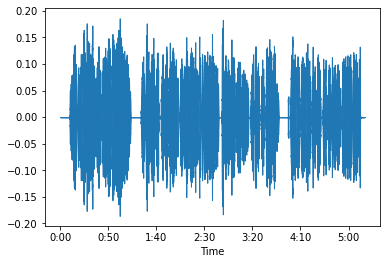

In [10]:
# Check recordings
folder = "../recordings/"
link = folder + "horn_solo_2.m4a"
# link = folder + "cancion-triste-1502.mp3"
signal, sr = librosa.load(link)

print(sr)
Audio(filename=link)
librosa.display.waveshow(signal, sr=sr)

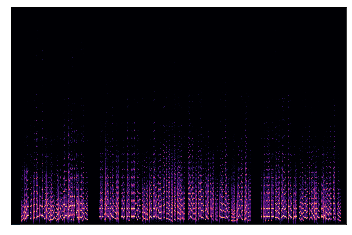

In [3]:
# write example output
librosa.display.waveshow(signal, sr=sr)
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr)
# librosa.output.write_wav(, signal, sr, norm=False)
sf.write(folder+"horn_solo_2.wav",signal[80_000:500_000], sr)

In [4]:
# Get all files of a specific instrument
from os import walk
filenames = next(walk(folder), (None, None, []))[2]  # [] if no file
filenames = [f for f in filenames if "horn" in f]
print(filenames)

concat_signal = np.array([])

for i,f in enumerate(filenames):
    print(f"{i} out of {len(filenames)}")
    link = folder + str(f)
    signal, sr = librosa.load(link)
    sf.write(folder+f[:-3]+"wav",signal, sr)
    concat_signal = np.concatenate((concat_signal,signal))
print(concat_signal.shape)

['horn_osul.m4a', 'horn_random.m4a', 'horn_simple.m4a', 'horn_solo.m4a', 'horn_solo_2.m4a', 'horn_solo_2.wav']
0 out of 6


c:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


1 out of 6
2 out of 6
3 out of 6
4 out of 6


KeyboardInterrupt: 

In [81]:
# Concetenate all files
# sf.write(folder+"horn_all.wav",concat_signal, sr)

In [11]:
# Remove pauses
t = np.zeros_like(signal)
# conved = np.convolve(np.ones(10_000),abs(signal),'same')

5.763071999999999
6.98368


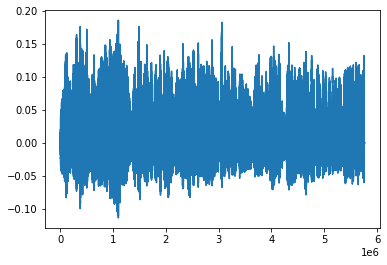

In [12]:
# t[conved<0.10]=1
# print(t.sum()*1/sr, len(t)/sr)
# idx_ = np.arange(900_000,1_000_000)
# plt.plot(signal[idx_]/max(signal[idx_]))
# plt.plot(conved[idx_]/max(conved[idx_]))

# valid_idx = conved / max(conved) > 0.1

# plt.figure()
# plt.plot(signal)
# plt.plot(signal[valid_idx])

# sf.write(folder+"without_brakes.wav",signal[valid_idx], sr)

# ---- Using LIBROSA
wav_data = Utils.remove_silence(signal,top_db=65)
# ----
print(len(wav_data)*1e-6)
# print(len(signal[valid_idx]) * 1e-6)
print(len(signal) * 1e-6)

plt.plot(wav_data)
sf.write(folder+"horn_solo_2_short.wav",wav_data[:16_000*10], sr)

In [5]:
# Put it to MP3
from pydub import AudioSegment
sound = AudioSegment.from_wav(folder+"wav/horn_solo_2.wav")
sound.export(folder+"wav/horn_solo_2.mp3", format="mp3", codec="libmp3lame")

<_io.BufferedRandom name='../recordings/wav/horn_solo_2.mp3'>

In [177]:
folder = "../recordings/"
link = folder + "guitar.m4a"
signal, sr = librosa.load(link)

C:\Users\User\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [178]:

s_without_silence = Utils.remove_silence(signal, top_db=40)
signal.shape[0] / s_without_silence.shape[0]
s_without_silence.shape[0]


23214080

In [182]:
# Split large recording
N = s_without_silence.shape[0]
file_str = "../recordings/processed/guitar_less_silence"
for i,k in enumerate([0,1*N//4,2*N//4,3*N//4]):
    Utils.save_audio_as_wav_and_mp3(s_without_silence[k:min(k+N//3,N-1)],sr=sr,save_str=f"{file_str}_{i}")